---

- 딥러닝 파이토치 교과서 ch7. 1~3  p. 360 ~371
# Chapter 7. 시계열 분석
### 7.1 시계열 문제
### 7.2 AR, MA, ARMA, ARIMA
### 7.3 순환신경망(RNN)
- RNN 실습 코드 : https://wikidocs.net/64703
---

# Chapter 7. 시계열 분석


## 7.1 시계열 문제
###시계열 분석이란?
- 시간에 따라 변화는 데이터를 사용하여 추이를 분석하는 것
- 예를 들어 주가/환율 변동 및 기온/습도 변화 등이 대표적인 시계열 분석
- 즉, 추세를 파악하거나 향후 전망을 예측하기 위한 용도로 시계열 분석을 사용

###데이터 변동 유형이 따른 시계열 형태 구분
- 불규칙 변동(irregular variation)
   - 시간에 따른 규칙적인 움직임이 없어
   - 예측 불가능하고 우연적으로 발생하는 변동
   - (예) 전쟁, 홍수, 화재, 지진, 파업
- 추세 변동(trend variation)
   - 장기적인 변환 추세
   - 추세란 장기간에 걸쳐 지속적으로 증가.감소하거나
   - 일정한 상태(stationary)를 유지하려는 성향을 의미
   - 짧은 기간 동안엔 추세 변동을 찾기 어려움
   - (예) 국내총생산(GDP), 인구증가율
- 순환 변동(cyclical variation)
   - 대체로 2~3년 정도의 일정한 기간을 주기로 순환적으로 나타나는 변동
   - 1년 이내 주기로 곡선을 그리며 추세 변동에 따라 변동
   - (예) 경기 변동
- 계절 변동(seasonal variation)
   - 계절적 영향과 사회적 관습에 따라 1년 주기로 발생
   - 계절에 따라 순환하여 변동

###트렌드 혹은 분산의 변환 여부에 따른 시계열 구분
- 규칙적 시계열
   - 데이터의 트렌드 혹은 분산이 불변
- 불규칙적 시계열
   - 데이터의 트렌드 혹은 분산이 변화
   - 불규칙성을 갖는 시계열 데이터에 특정한 기법이나 모델을 적용하여 규치적 패턴을 찾거나 예측하는 것이 시계열 데이터를 잘 분석한다는 의미
   - 불규칙적 시계열 데이터에 규칙성을 부여하는 방법으로 AR, MA, ARMA, ARMIA가 있음.
   - 최근엔 딥러닝을 이용하여 시계열 데이터의 연속성을 기계가 스스로 찾아내도록 하는 방법이 더 좋은 성능을 냄.


## 7.2 AR, MA, ARMA, ARIMA
- 시계열 분석은 독립 변수(시간)를 사용하여 종속 변수를 예측
- 일반적인 머신러닝에서 시간을 독립 변수를 사용하는 것과 같음
- 독립 변수로 시간을 사용하는 방법론들의 차이를 AR, MA, ARMA, ARIMA 모형들로 설명

### 7.2.1 AR 모델 (AutoRegressive)
- 이전 관측값이 이후 관측 값에 영향을 준다는 아이디어에 대한 모형
- 자기 회귀 모델이라고도 함
- p 시점을 기준으로 그 이전의 데이터에 의해 현재 시점의 데이터가 영향을 받는 모형을 수식으로 표현
   
   ① 현재 시점의 시계열 데이터
   
   ② 과거가 현재에 미치는 영향을 의미하는 모수에 시게열 데이터의 과거 시점을 곱한 것
   
   ③ 오차항 = 백색 잡음



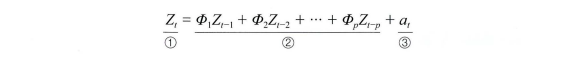

### 7.2.2 MA 모델 (Moving Average)
- 트렌드 (평균 또는 y값)가 변환하는 상황에 적합한 회귀 모델
- 이동 평균 모델이라고도 부름
- 시계열을 따라 윈도우 크기만큼 슬라이딩(moving)시킴
- MA 모델: 이전 데이터의 **오차**에서 현재 데이터의 **상태**를 추론
  
  AR 모델: 이전 데이터의 **상태**에서 현재 데이터의 **상태**를 추론
- 수식:

   ① 현재 시점의 시계열 데이터
   
   ② 매개변수에 과거 시점의 오차를 곱한 것
   
   ③ 오차항 = 백색 잡음

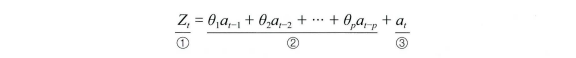

### 7.2.3 ARMA 모델 (AutoRegressive Moving Average)
- 자기 회귀 이동 평균
- 과거 데이터의 선형 관계를 고려
- 두가지 관점에서 과거의 데이터를 사용하여 현재 상태를 추론

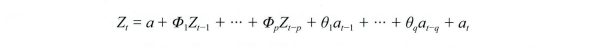

### 7.2.4 ARIMA 모델 (AutoRegressive Integreated Moving Average)
- 자기 회귀 누적 이동 평균
- ARMA + 추세(cointegration)
- #### statsmodels 라이브러리를 이용하여 ARIMA(5,1,0) 모델 구현
ℹ️ statsmodels 라이브러리에선 다음 통계 분석 기능을 제공
      - 검정과 추정(test and estimation)
      - 회귀 분석(regression analysis)
      - 시계열 분석(time-series analysis)

In [ ]:
# statsmodels 라이브러리 설치
!pip install statsmodels

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-10-8d1c3a7e7ae0>:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('/content/drive/MyDrive/ESAA_OB/Dataset/sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser) # 자전거 매출에 대한 CSV 데이터 호출
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                Wed, 28 May 2025   AIC                            411.302
Time:                        05:53:58   BIC                            420.634
Sample:                    01-01-1991   HQIC                           414.523
                         - 12-01-1993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.9

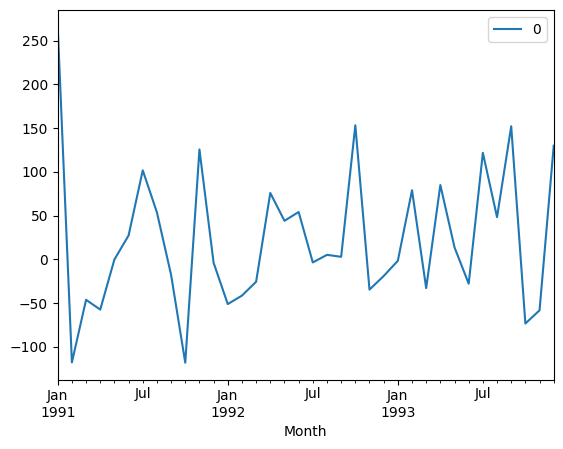

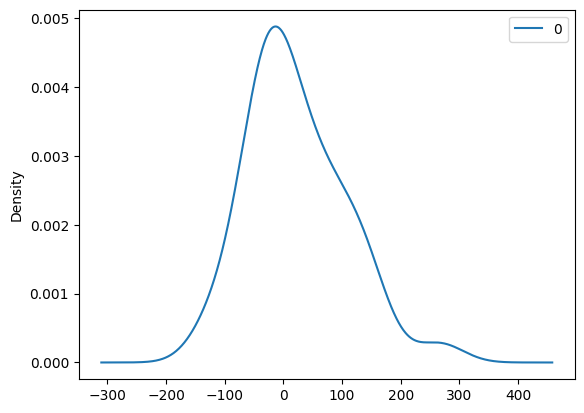

                0
count   36.000000
mean    22.459086
std     82.505331
min   -118.213281
25%    -33.308343
50%      1.361178
75%     76.704967
max    266.000000


In [ ]:
# ARIMA() 함수를 호출하여 sales 데이터셋에 대한 예측
from pandas import read_csv # 파이썬 판다스 라이브러리의 read_csv() 메서드를 사용해서 외부 TEXT 파일, CSV를 불러와서 DataFrame으로 저장
from datetime import datetime
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

def parser(x): # 시간을 표현하는 함수 정의
  return datetime.strptime('199'+x, '%Y-%m') # strptime()은 날짜와 시간 정보를 문자열로 바꿔주는 메서드

series = read_csv('/content/drive/MyDrive/ESAA_OB/Dataset/sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser) # 자전거 매출에 대한 CSV 데이터 호출
if series.shape[1] == 1:
    series = series.squeeze("columns")

model = ARIMA(series, order=(5,1,0)) # ARIMA() 함수 호출
model_fit = model.fit() # 구버전 ARIMA에선 모형을 적용할 때 많은 디버그 정보가 제공되는데 disp 인수를 0으로 설정하여 이 기능을 비활성화
print(model_fit.summary()) # 모델에 대한 정보 표시

residuals = DataFrame(model_fit.resid) # DataFrame에 모델에 대한 오차 정보를 residuals라는 변수에 저장
residuals.plot() # residuals 정보를 시각적으로 표현
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

- 아래 그래프는 오류 분포임.
- 값이 치우쳐져 있음.
- 즉, 오류 평균(mean)이 0이 아님.

<ipython-input-13-5c2f26a7e6af>:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('/content/drive/MyDrive/ESAA_OB/Dataset/sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser) # 자전거 매출에 대한 CSV 데이터 호출


predicted=352.855343, expected=346.300000
predicted=277.398036, expected=329.700000
predicted=368.753734, expected=445.400000
predicted=331.773635, expected=325.900000
predicted=372.070407, expected=449.300000
predicted=360.020872, expected=411.300000
predicted=454.526230, expected=417.400000
predicted=388.690699, expected=545.500000
predicted=437.632447, expected=477.600000
predicted=516.437624, expected=687.000000
predicted=520.916191, expected=435.300000
predicted=675.594647, expected=587.300000
predicted=505.201016, expected=676.900000
Test MSE:, 9118.818


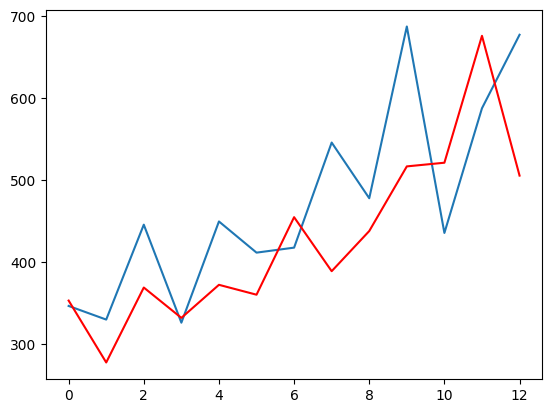

In [ ]:
# statsmodels 라이브러리를 이용한 sales 데이터셋 예측
import numpy as np
from sklearn.metrics import mean_squared_error

def parser(x):
  return datetime.strptime('199'+x, '%Y-%m')

series = read_csv('/content/drive/MyDrive/ESAA_OB/Dataset/sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser) # 자전거 매출에 대한 CSV 데이터 호출
if series.shape[1] == 1:
    series = series.squeeze("columns")

X = series.values
y = np.nan_to_num(X)
size = int(len(X)*0.66)
train, test = X[0:size], X[size:len(X)] # train과 test로 데이텃세 분리
history = [x for x in train]
predictions = list()
for t in range(len(test)): # test 데이텃세의 길이(13)만큼 반복하며 수행
  model = ARIMA(history, order=(5,1,0)) # ARIMA() 함수 호출
  model_fit = model.fit()
  output = model_fit.forecast() # forcast() 메서드를 사용하여 예측 수행
  yhat = output[0] # 모델 출력 결과를 yhat에 저장
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  print('predicted=%f, expected=%f'%(yhat, obs)) # 모델 실행 결과를 predicted로 출력하고, test로 분리해둔 데이터를 expected를 사용하여 출력
error = mean_squared_error(test, predictions) # 손실함수로 평균 제곱 오차 사용
print('Test MSE:, %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

- 실제 데이터: 빨간색
- 모형 실행 결과: 파란색

- 데이터가 우상향 추세를 나타내므로 자전거 판매가 향후에도 계속 증가할 것임을 예측할 수 있음.

## 7.3 순환 신경망 (RNN)
- RNN(Recurrent Neural Network)는 시간적으로 연속성이 있는 데이터를 처리하려고 고안된 인공 신경망
- Recurrent는 이전 은닉층이 현재 은닉층의 입력이 되면서 '반복되는 순환 구조를 갖는다'는 의미
- 새로운 입력이 네트워크로 들어올 때마다 기억(memory)가 조금씩 수정되며, 최종적으로 남겨진 기억은 모든 입력 전체를 요약한 정보가 됨.
- RNN의 대표적인 활용 분야론 자연어 처리, 손글씨, 센서 데이터 처리가 있음.
   - 연속적인 단어들의 나열인 자연어을 다룸
   - 음성 인식, 단어의 의미 판단 및 대화에 대한 처리


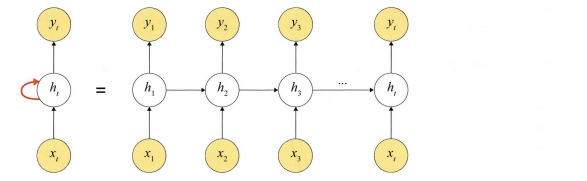

### 입력과 출력에 따른 RNN의 유형
- 일대일
   - 순환이 없어서 RNN이라고 보기 어려움
   - 순방향 네트워크

- 일대다
   - 입력이 하나, 출력이 다수
   - (예) 이미지 캡션: 이미지를 입력해서 이미지에 대한 설명을 문장으로 출력
- 다대일
   - 입력이 여러개, 출력이 하나
   - (예) 감성 분석기: 문장을 입력해서 긍정/부정을 출력


```
# 다대일에 대한 모델을 파이토치에서 구현한 예시 코드
self.em = nn.Embedding(len(TEXT.vocab.stoi), embedding_dim) # 임베딩 처리
self.rnn = nn.RNNCell(input_dim, hidden_size) # RNN 적용
self.fc1 = nn.Linear(hidden_size, 256) # 완전연결층
self.fc2 = nn.Linear(256, 3) # 출력층
```



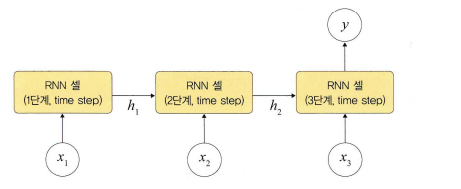

다대일 구조에 층을 쌓아올리면 다음과 같은 적층된 다대일 모델 생성이 가능

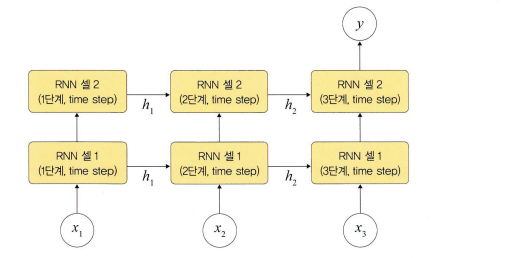

- 다대다
   - 입력 여러개, 출력 여러개
   - (예) 언어를 번역하는 자동 번역기
   - 텐서플로에선 `keras.layers.SimpleRNN(100, return_sequences=True, name='RNN')`처럼 시퀀스를 리턴하도록 쉽게 구현 가능
   - 반면 파이토치에선 seq2seq를 이용



```
# 파이토치를 이용한 다대다 모델 코드 구현
Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(7855, 256)
    (rnn): LSTM(256, 512, num_layers=2, dropout=0.5)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Decoder(
    (embedding): Embedding(5893, 256)
    (rnn): LSTM(256, 512, num_layers=2, dropout=0.5)
    (fc_out): Linear(in_features=512, out_features=5893, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
)

```



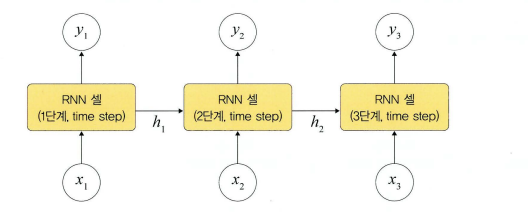

- 동기화 다대다
   - 입력과 출력이 다수
   - 문장에서 다음에 나올 단어를 예측하는 언어 모델
   - (예) 프레임 수준의 비디오 분류

앞서 언급된 순환 신경망 구조들을 그림으로 정리

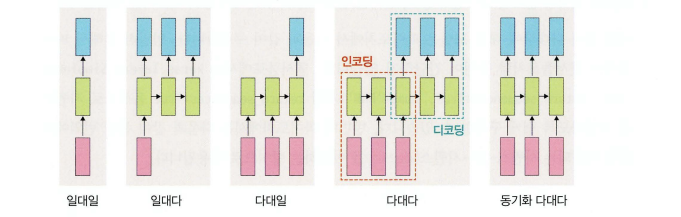

## 7.3.1 RNN 계층(layer)과 셀(cell)
- RNN은 내장된 계층 뿐 아니라 셀 레벨의 API도 제공
- RNN 계층은 입력된 배치 순서대로 모두 처리
- RNN 셀은 오직 하나의 time step만 처리
- RNN 셀을 RNN 계층의 for loop 구문을 갖는 구조


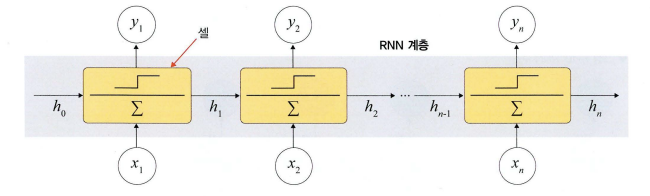

그림에선 X1, X2, ... Xn 등이 전체 RNN 셀에서 사용되고 있음.

- RNN 계층을 셀을 래핑하여 동일한 셀을 여러 단계에 적용
   - 래핑이란? dll이나 API를 사용하기 쉽도록 한번 더 dll 등으로 만들어주는 것
- 셀은 실제 계산에 사용되는 RNN 계층의 구성 요소
- 셀은 단일 입력과 과거 상태(state)를 가져와서 출력과 새로운 상태를 생성
- 파이토치에선 RNN의 계층과 셀을 분리해서 구현 가능


### 셀 유형
- `nn.RNNCell`: SimpleRNN 계층에 대응되는 RNN 셀
- `nn.GRUCell`:  GRU 계층에 대용되는 GRU 셀
- `nn.LSTMCell`: LSTM 계층에 대응되는 LSTM 셀